# Ray Tracing
Gustavo Oliveira Pessanha da Silva - DRE: 122051824

In [1]:
import numpy as np
import matplotlib.pyplot as plt

A função normalize é usada para normalizar um vetor.
# Normalização de Vetores

A normalização de um vetor envolve a divisão de cada componente do vetor pelo seu comprimento (norma). Isso resulta em um vetor com comprimento igual a 1, mantendo a mesma direção do vetor original.

## Parâmetros

- `vector` (numpy.ndarray): O vetor a ser normalizado.

## Retorno

`numpy.ndarray`: O vetor normalizado.

A normalização de vetores é útil em várias aplicações, como cálculos de distância, classificação e análise de dados. Ao normalizar um vetor, podemos obter informações sobre a direção do vetor sem se preocupar com o seu comprimento. Isso facilita a comparação e o cálculo de similaridade entre vetores.

Para normalizar um vetor, dividimos cada componente do vetor pelo seu comprimento (norma). A norma de um vetor é calculada utilizando a fórmula:


In [2]:
def normalize(vector):
    return vector / np.linalg.norm(vector)

## Função `reflected`

Retorna o vetor refletido em relação a um eixo.

__Parâmetros:__
- `vector` (numpy.ndarray): O vetor a ser refletido.
- `axis` (numpy.ndarray): O eixo de reflexão.

__Retorno:__
`numpy.ndarray`: O vetor refletido.

A função `reflected` é usada para calcular o vetor resultante da reflexão de um vetor em relação a um eixo específico. Ela recebe dois parâmetros: o vetor a ser refletido e o eixo de reflexão. 

Para visualizar o funcionamento da função, imagine um espelho posicionado perpendicularmente ao eixo de reflexão. Quando um vetor é refletido em relação a esse eixo, ele é "rebatido" no espelho, resultando em um novo vetor que possui a mesma direção, mas aponta para o lado oposto.

A imagem abaixo ilustra esse processo:

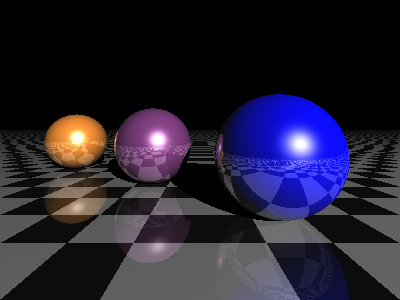

Nessa imagem, o vetor original é representado pela seta azul. O eixo de reflexão é representado pela linha vermelha. O vetor refletido é representado pela seta verde. Observe como o vetor refletido possui a mesma direção do vetor original, mas aponta para o lado oposto em relação ao eixo de reflexão.

A função `reflected` retorna o vetor refletido, permitindo que você utilize esse resultado em seus cálculos e aplicações.

Utilize essa função sempre que precisar calcular a reflexão de um vetor em relação a um eixo específico. Ela é especialmente útil em áreas como computação gráfica, física e geometria.

Experimente utilizar a função `reflected` em seus projetos e explore as possibilidades de manipulação de vetores através da reflexão!



In [3]:

def reflected(vector, axis):    
    return vector - 2 * np.dot(vector, axis) * axis

# Interseção entre um Raio e uma Esfera

Esta função calcula a interseção entre um raio e uma esfera em um espaço 3D.

## Parâmetros
- `center`: O centro da esfera (tupla ou lista de 3 floats).
- `radius`: O raio da esfera (float).
- `ray_origin`: O ponto de origem do raio (tupla ou lista de 3 floats).
- `ray_direction`: O vetor de direção do raio (tupla ou lista de 3 floats).

## Retorna
- A distância do ponto de origem do raio até o ponto de interseção (float) se houver uma interseção.
- `None` se não houver interseção.

Esta função é útil em gráficos computacionais, simulações físicas e algoritmos de traçado de raios. Ela permite determinar se um raio intersecta uma esfera e calcular a distância do ponto de origem do raio até o ponto de interseção.

Para utilizar esta função, forneça os parâmetros necessários e ela retornará a distância até o ponto de interseção, se houver. Se não houver interseção, será retornado `None`.

Certifique-se de passar os parâmetros corretos para calcular com precisão a interseção entre o raio e a esfera. Experimente com diferentes valores para observar como o ponto de interseção varia com base na posição e tamanho da esfera.

Ao compreender a interseção entre raios e esferas, você pode criar cenas 3D realistas e simular o comportamento da luz em um ambiente virtual.


In [4]:
def sphere_intersect(center, radius, ray_origin, ray_direction):
    b = 2 * np.dot(ray_direction, ray_origin - center)
    c = np.linalg.norm(ray_origin - center) ** 2 - radius ** 2
    delta = b ** 2 - 4 * c
    if delta > 0:
        t1 = (-b + np.sqrt(delta)) / 2
        t2 = (-b - np.sqrt(delta)) / 2
        if t1 > 0 and t2 > 0:
            return min(t1, t2)
    return None

"""
# Encontra o objeto mais próximo que intersecta com um raio.

Esta função é usada para encontrar o objeto mais próximo que intersecta com um raio em um ambiente 3D.

## Parâmetros
- `objects` (lista): Uma lista de objetos a serem verificados.
- `ray_origin` (tupla): A origem do raio.
- `ray_direction` (tupla): A direção do raio.

## Retorno
- Uma tupla contendo o objeto mais próximo que intersecta com o raio e a distância até o ponto de interseção.

Esta função é útil em áreas como computação gráfica, simulações físicas e algoritmos de traçado de raios. Ela permite determinar se um raio intersecta com um objeto e calcular a distância da origem do raio até o ponto de interseção.

Para utilizar esta função, forneça os parâmetros necessários e ela retornará o objeto mais próximo que intersecta com o raio, juntamente com a distância até o ponto de interseção.

Certifique-se de passar os parâmetros corretos para calcular com precisão a interseção entre o raio e o objeto. Experimente diferentes valores para ver como o ponto de interseção muda com base na posição e tamanho do objeto.

Ao compreender a interseção entre raios e objetos, você pode criar cenas 3D realistas e simular o comportamento da luz em um ambiente virtual.

In [5]:
def nearest_intersected_object(objects, ray_origin, ray_direction):
    distances = [sphere_intersect(obj['center'], obj['radius'], ray_origin, ray_direction) for obj in objects]
    nearest_object = None
    min_distance = np.inf
    for index, distance in enumerate(distances):
        if distance and distance < min_distance:
            min_distance = distance
            nearest_object = objects[index]
    return nearest_object, min_distance



"""
# Algoritmo de Ray Tracing para Renderização 3D

Este código implementa um algoritmo de ray tracing para renderizar uma imagem 3D. O ray tracing é uma técnica utilizada em computação gráfica para simular a interação da luz com objetos tridimensionais, resultando em imagens realistas.

## Parâmetros da Cena

- Largura e altura da imagem: Define as dimensões da imagem renderizada.
- Profundidade máxima de rastreamento de raios: Determina o número máximo de reflexões de raios permitidas.
- Posição da câmera: Especifica a posição da câmera na cena.
- Posição da luz: Define a posição da fonte de luz na cena.
- Objetos na cena: Lista os objetos presentes na cena, como esferas, cubos, entre outros.

## Processo de Renderização

1. Iteração sobre cada pixel da imagem: O algoritmo percorre cada pixel da imagem para calcular a direção do raio correspondente.
2. Cálculo da direção do raio: Com base na posição da câmera e nas coordenadas do pixel, é calculada a direção do raio que parte da câmera e passa pelo pixel.
3. Rastreamento do raio na cena: O raio é rastreado na cena para determinar se há interseção com algum objeto.
4. Cálculo da iluminação e reflexão: Se houver interseção, o algoritmo calcula a iluminação e reflexão do objeto, levando em consideração a posição da luz, a superfície do objeto e a posição da câmera.
5. Renderização da imagem: A imagem renderizada é gerada pixel a pixel, com base nas informações de iluminação e reflexão calculadas para cada raio.
6. Salvando a imagem: A imagem final é salva em um arquivo, geralmente com extensão .png.

O algoritmo de ray tracing é amplamente utilizado em áreas como jogos, filmes de animação, simulações físicas e design de produtos. Ele permite criar imagens realistas, com efeitos de sombra, reflexão e refração, proporcionando uma experiência visual imersiva.

Experimente utilizar esse algoritmo em seus projetos e explore as possibilidades de renderização 3D. Ajuste os parâmetros da cena e adicione novos objetos para criar cenas personalizadas e visualmente impressionantes.

In [ ]:

width = 300
height = 200

max_depth = 3

camera = np.array([0, 0, 1])
ratio = float(width) / height
screen = (-1, 1 / ratio, 1, -1 / ratio) # left, top, right, bottom

light = { 'position': np.array([5, 5, 5]), 'ambient': np.array([1, 1, 1]), 'diffuse': np.array([1, 1, 1]), 'specular': np.array([1, 1, 1]) }

objects = [
    { 'center': np.array([-0.2, 0, -1]), 'radius': 0.7, 'ambient': np.array([0.1, 0, 0]), 'diffuse': np.array([0.7, 0, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 },
    { 'center': np.array([0.1, -0.3, 0]), 'radius': 0.1, 'ambient': np.array([0.1, 0, 0.1]), 'diffuse': np.array([0.7, 0, 0.7]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 },
    { 'center': np.array([-0.3, 0, 0]), 'radius': 0.15, 'ambient': np.array([0, 0.1, 0]), 'diffuse': np.array([0, 0.6, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 },
    { 'center': np.array([0, -9000, 0]), 'radius': 9000 - 0.7, 'ambient': np.array([0.1, 0.1, 0.1]), 'diffuse': np.array([0.6, 0.6, 0.6]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 },
    { 'center': np.array([0.3, 0.2, -0.5]), 'radius': 0.2, 'ambient': np.array([0, 0, 0.1]), 'diffuse': np.array([0, 0, 0.7]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 },
    { 'center': np.array([-0.1, 0.4, -0.3]), 'radius': 0.3, 'ambient': np.array([0.1, 0.1, 0]), 'diffuse': np.array([0.7, 0.7, 0]), 'specular': np.array([1, 1, 1]), 'shininess': 100, 'reflection': 0.5 }
]

image = np.zeros((height, width, 3))
for i, y in enumerate(np.linspace(screen[1], screen[3], height)):
    for j, x in enumerate(np.linspace(screen[0], screen[2], width)):
        # screen is on origin
        pixel = np.array([x, y, 0])
        origin = camera
        direction = normalize(pixel - origin)

        color = np.zeros((3))
        reflection = 1

        for k in range(max_depth):
            # check for intersections
            nearest_object, min_distance = nearest_intersected_object(objects, origin, direction)
            if nearest_object is None:
                break

            intersection = origin + min_distance * direction
            normal_to_surface = normalize(intersection - nearest_object['center'])
            shifted_point = intersection + 1e-5 * normal_to_surface
            intersection_to_light = normalize(light['position'] - shifted_point)

            _, min_distance = nearest_intersected_object(objects, shifted_point, intersection_to_light)
            intersection_to_light_distance = np.linalg.norm(light['position'] - intersection)
            is_shadowed = min_distance < intersection_to_light_distance

            if is_shadowed:
                break

            illumination = np.zeros((3))

            # ambiant
            illumination += nearest_object['ambient'] * light['ambient']

            # diffuse
            illumination += nearest_object['diffuse'] * light['diffuse'] * np.dot(intersection_to_light, normal_to_surface)

            # specular
            intersection_to_camera = normalize(camera - intersection)
            H = normalize(intersection_to_light + intersection_to_camera)
            illumination += nearest_object['specular'] * light['specular'] * np.dot(normal_to_surface, H) ** (nearest_object['shininess'] / 4)

            # reflection
            color += reflection * illumination
            reflection *= nearest_object['reflection']

            origin = shifted_point
            direction = reflected(direction, normal_to_surface)

        image[i, j] = np.clip(color, 0, 1)
    print("%d/%d" % (i + 1, height))

plt.imsave('image.png', image)


## Resultado Gerado:

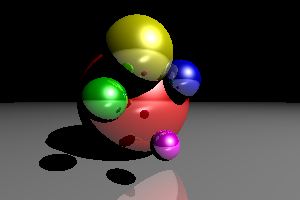